In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

import reverse_geocoder as rg
import pprint

%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [8]:
df.drop(['Loan_ID'],axis=1,inplace=True)

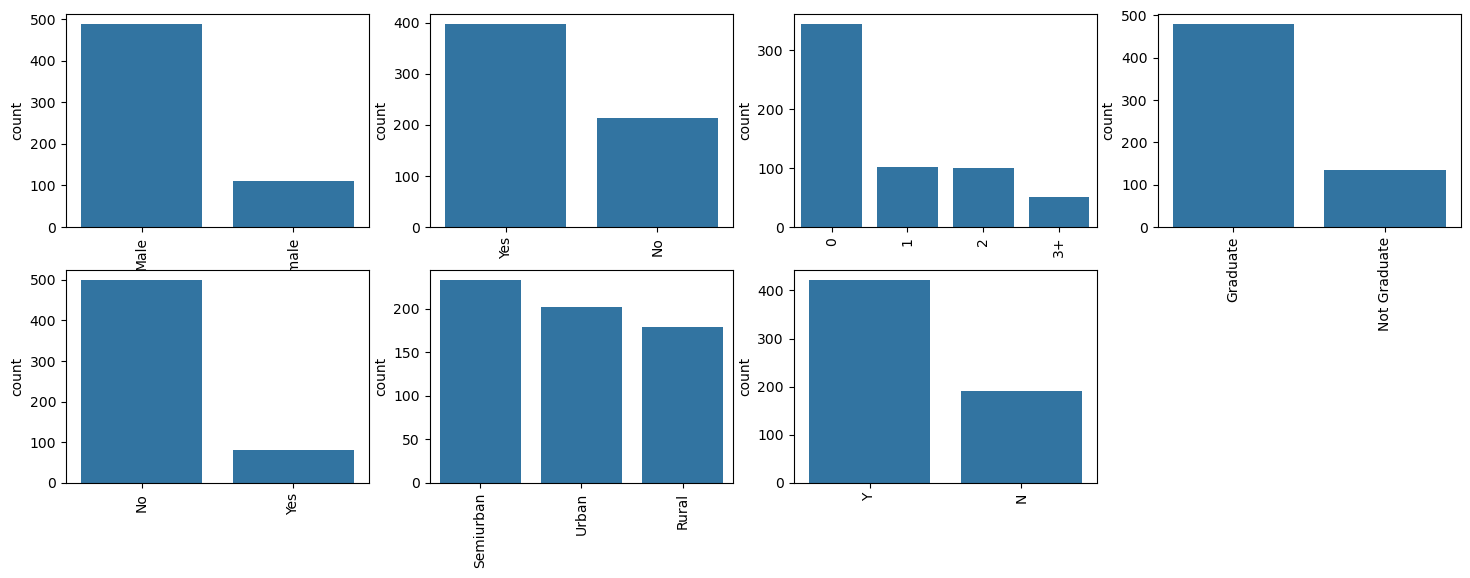

In [10]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

In [13]:
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how 
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])

In [14]:
# To find the number of columns with 
# datatype==object 
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

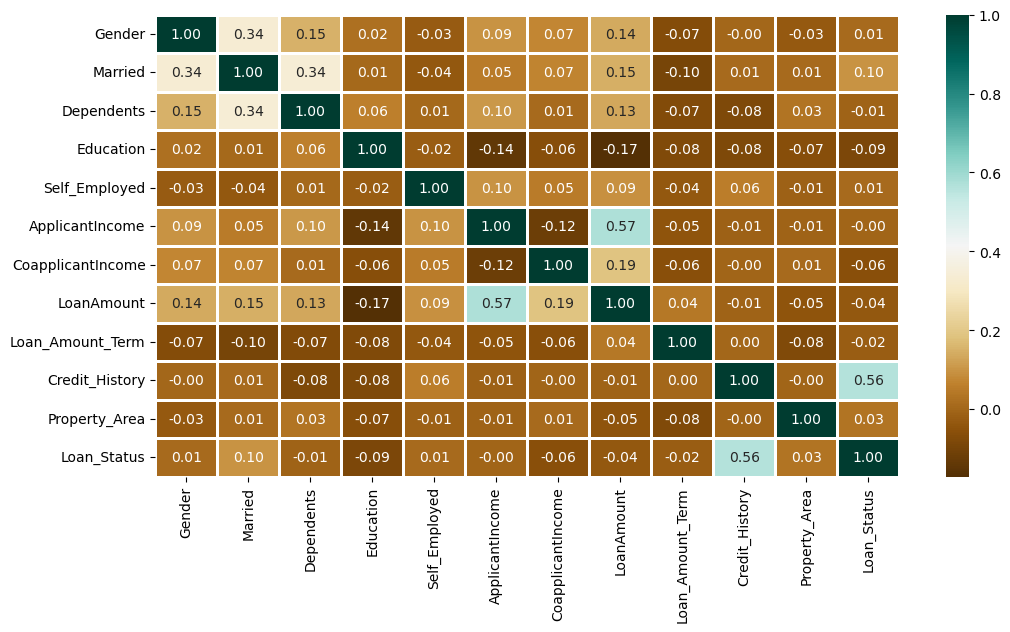

In [16]:
plt.figure(figsize=(12,6)) 

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f', linewidths=2,annot=True)

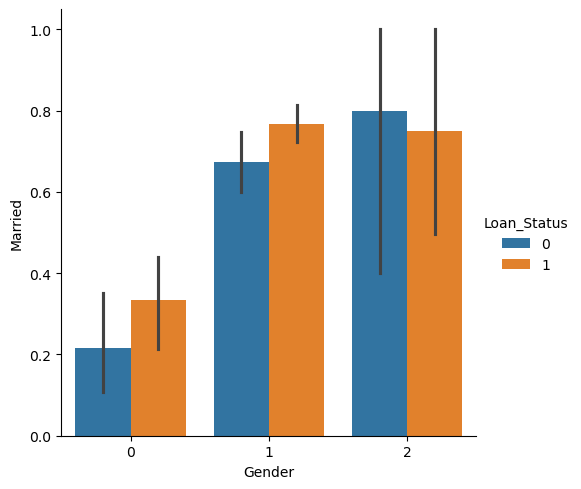

In [18]:
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=df)

In [21]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split 

X = df.drop(['Loan_Status'],axis=1) 
Y = df['Loan_Status'] 
X.shape, Y.shape 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [26]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7) 
svc = SVC() 
lc = LogisticRegression()

# making predictions on the training set 
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 97.01086956521739
Accuracy score of  KNeighborsClassifier = 77.17391304347827
Accuracy score of  SVC = 70.38043478260869
Accuracy score of  LogisticRegression = 82.88043478260869


In [27]:
# making predictions on the testing set 
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of  RandomForestClassifier = 76.42276422764228
Accuracy score of  KNeighborsClassifier = 62.19512195121951
Accuracy score of  SVC = 67.07317073170732
Accuracy score of  LogisticRegression = 78.86178861788618


# Conclusion :

Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.

Don't miss your chance to ride the wave of the data revolution! Every industry is scaling new heights by tapping into the power of data. Sharpen your skills, become a part of the hottest trend in the 21st century.
Dive into the future of technology - explore the Complete Machine Learning and Data Science Program by GeeksforGeeks and stay ahead of the curve.